## Exploration for Claim 2: ##
    Having porch or deck increases home sale price

### Null hypothesis: There is no relationship between outdoor space and sale price

### Alternative hypothesis: There is a relationship between outdoor space and sale price



### Make necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms

%matplotlib inline
plt.style.use('ggplot')

#from ltests import model

### Import our combined csv into a DataFrame

In [2]:
raw = pd.read_csv('../../data/master.csv', low_memory=False, dtype={'id': object})


In [3]:
#how many entries are there?
raw.shape[0]

62039

### SalePrice will be our target variable, so lets' set that as the index

In [6]:
#set the target to column index 0
cols = list(raw.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
raw = raw[cols]
raw.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
0,9796500,0000200042,3003343,08/02/2019,20190805001366,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0001000004,3003032,06/26/2019,20190802000413,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,485500,0001000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
3,0,0001000047,2994317,05/15/2019,20190618001163,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6050000,0001000056,3012411,09/27/2019,20190927001106,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We would like to select only those entries that have a sale price greater than 0

In [7]:
raw = raw[raw.SalePrice > 0]

#How many entries are left?
raw.shape[0]

42214

### Now we select the sales with the proper PropertyType codes
The following is interest to us:
 - 11: Household, single family units

These are not because they don't help us answer our questions about homeownership

 - 12: Multiple family residence (Residential, 2-4 units)
 - 13: Multiple family residence (Residential, 5+ units)
 - 14: Residential condominiums
  
*These codes can be found in the Lookup.zip file located at*

https://info.kingcounty.gov/assessor/DataDownload/default.aspx 

In [8]:
proptypes = [11]

df = raw[raw.PropertyType.isin(proptypes)]

#How many entries are left now?
df.shape[0]


19264

### Let's look at houses that have any porch or deck (aka OutdoorSpace)

In [9]:
#add column to dataframe OutdoorSpace
df['OutdoorSpace']= df['SqFtOpenPorch']+df['SqFtEnclosedPorch']+df['SqFtDeck']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# How many entries have we got?
# It should still be 19264.
df.shape[0]

19264

In [11]:
#filling in NaN with zero
#assuming they are NaN because there is no porch or deck
#df['OutdoorSpace'] = df['OutdoorSpace'].fillna(0)

### Generate our first simple model of Sale Price vs OutdoorSpace

In [12]:
fsm_df = df[["SalePrice", "OutdoorSpace"]].copy()
fsm_df.dropna(inplace=True)
formula = 'SalePrice ~ OutdoorSpace'
fsm = ols(formula=formula, data=fsm_df).fit()

What kind of p-value have we got?

In [13]:
fsm.pvalues

Intercept       0.0
OutdoorSpace    0.0
dtype: float64

Well that was unexpected.

##### Let's look at the summary

In [14]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:56:32   Log-Likelihood:            -2.7555e+05
No. Observations:               18807   AIC:                         5.511e+05
Df Residuals:                   18805   BIC:                         5.511e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.368e+05   5272.490    120.785      0.000    6.27e+05    6.47e+05
OutdoorSpace   741.5369     15.527     47.757      0.000     711.102     771.972
==============================================================================
Omnibus:                    22379.481   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7310011.498
Skew:                           5.961   Prob(JB):                         0.00
Kurtosis:                      98.845   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result?

That is not a very good looking R^2. Only 0.075

## Check homoscedasticity

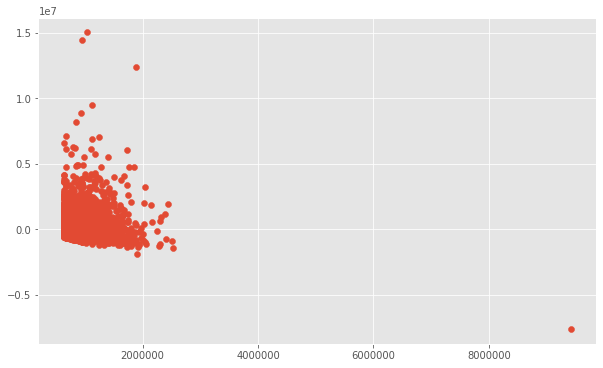

In [15]:
fsm_resids = fsm.resid
y_hat = fsm.predict()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_hat, fsm_resids);

Ok. A couple of weird outliers...

## check normality with Q-Q plot

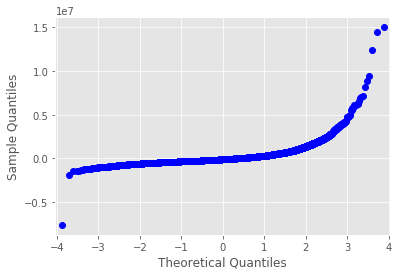

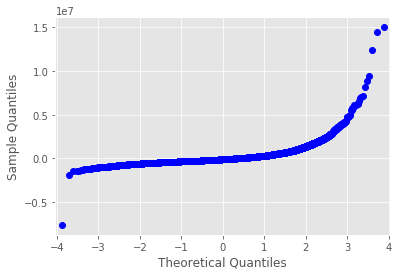

In [17]:
sm.qqplot(fsm_resids)

This line is not instilling me with any confidence

## check normality with Jarque Bera test

In [18]:
name = ['JB', 'Prob', 'Skew', 'Kurtosis']
test = sms.jarque_bera(fsm.resid)
list(zip(name, test))

[('JB', 7310011.497733926),
 ('Prob', 0.0),
 ('Skew', 5.960539851927171),
 ('Kurtosis', 98.84541756868039)]

None of this is looking very useful

### Let's try do drop some outliers 

let's remove elements with a z-score outsize of [-3,3] in either the sale price or the outdoor space columns

In [19]:
from scipy import stats
ssm_df = fsm_df[(np.abs(stats.zscore(fsm_df)) < 3).all(axis=1)]

In [30]:
#How many values have we got left?
#We started with 19264
ssm_df.shape[0]

18247

We removed 1017 outliers

In [31]:
formula = 'SalePrice ~ OutdoorSpace'
ssm = ols(formula=formula, data=ssm_df).fit()

In [32]:
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1875.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:06:10   Log-Likelihood:            -2.5976e+05
No. Observations:               18247   AIC:                         5.195e+05
Df Residuals:                   18245   BIC:                         5.195e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.268e+05   3780.263    165.809      0.000    6.19e+05    6.34e+05
OutdoorSpace   582.9525     13.465     43.296      0.000     556.561     609.344
==============================================================================
Omnibus:                     5083.324   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14061.776
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                       6.113   Cond. No.                         389.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well the R^2 is marginally improved. Still have a 0 pvalue(?) tho.

## Check homoscedasticity again

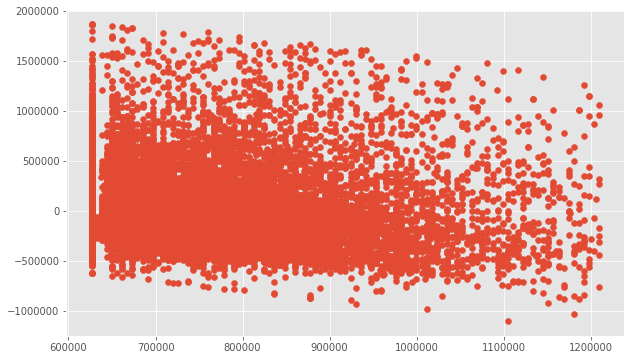

In [33]:
ssm_resids = ssm.resid
y_hat = ssm.predict()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_hat, ssm_resids);

That vertical line on the left side does not look great, but the rest seems ok-ish.

## check normality with Q-Q plot again

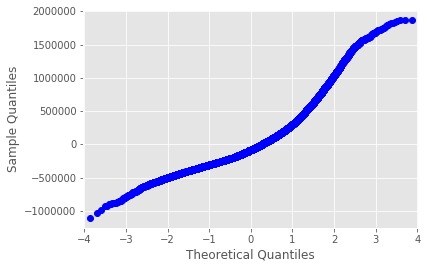

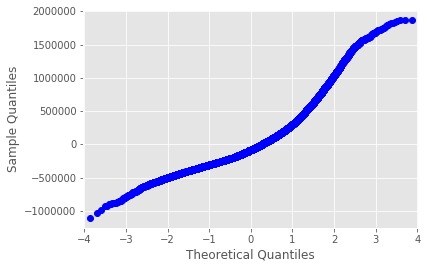

In [34]:
sm.qqplot(ssm_resids)

This line is slightly better. At least it is pointing in the rigth direction.

## check normality with Jarque Bera test again

In [35]:
name = ['JB', 'Prob', 'Skew', 'Kurtosis']
test = sms.jarque_bera(ssm.resid)
list(zip(name, test))

[('JB', 14061.77569999097),
 ('Prob', 0.0),
 ('Skew', 1.4837659248716786),
 ('Kurtosis', 6.112714766043607)]

JB number came down. Skew came down. Kurtosis looks much better. Still not sure what's up with the p value

## Let's have a look at a T-test

Maybe that will help make some sense.

In [41]:
#create dataframe with OutdoorSpace greater than zero... 
# meaning these are houses with a porch or deck
porch = ssm_df[ssm_df.OutdoorSpace > 0]

# how many values have we got?
a=porch.shape[0]
print(f'There are {a} houses with outdoor space.')

There are 14132 houses with outdoor space.


In [43]:
#These are houses with no outdoor space
no_porch = ssm_df[ssm_df.OutdoorSpace == 0] 
# how many values have we got here?
b=no_porch.shape[0]
print(f'There are {b} houses with outdoor space.')

There are 4115 houses with outdoor space.


In [45]:
#Have we still got 18247 values?
print(a+b)

18247


In [47]:
control = no_porch.SalePrice.values

In [46]:
alt = porch.SalePrice.values

In [51]:
control.mean(), alt.mean()

(605920.7044957472, 779257.8966883668)

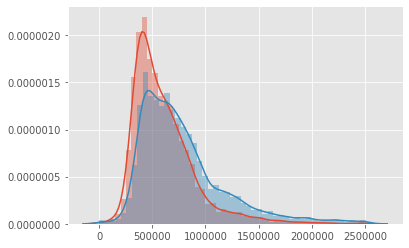

In [49]:
sns.distplot(control)
sns.distplot(alt)


In [50]:
from scipy.stats import ttest_ind
critical_tstat = stats.t.ppf(.95, 21479)

ttest_result=ttest_ind(control, alt)
print(f'critical t_stat: {critical_tstat}')
print(f'test t-stat: {ttest_result.statistic}')
print(f'pvalue = {ttest_result.pvalue/2}')

critical t_stat: 1.6449245723060157
test t-stat: -25.756409260293648
pvalue = 5.016047429874646e-144


### It looks like we are going to accept the Null hypothesis here.

From what I can see, there does not seem to be a relationship between having outdoor space and the sale price of the house.

Maybe the combined number was not a good idea. How about a test between types of space?